## Load

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Data - MNIST

In [98]:
mnist = keras.datasets.mnist

In [99]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [100]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0 , x_test / 255.0

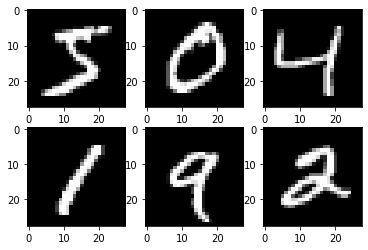

In [101]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
plt.show()

In [102]:
# Numpy Arrays
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,28*28).astype("float32")/255.0

# tf.convert_to_tensor is done already by TF

## Sequential
For one-to-one tasks only
Good for this task, not very flexible

In [103]:
model = keras.Sequential(
    [
      keras.Input(shape = (28*28)),
      layers.Dense(512, activation = 'leaky_relu'),
      layers.Dense(256, activation = 'leaky_relu'),
      layers.Dense(10),
    ]
)
# Softmax on loss function

In [104]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # Without Sparse -  OHE vectors
    # Else - just an int referring to the correct class

    optimizer = keras.optimizers.Adam(lr = 1e-3),
    metrics = ["accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [105]:
model.fit(x_train, y_train, batch_size = 32, epochs = 5, verbose = 2)


Epoch 1/5
1875/1875 - 12s - loss: 0.2044 - accuracy: 0.9377 - 12s/epoch - 6ms/step
Epoch 2/5
1875/1875 - 12s - loss: 0.1046 - accuracy: 0.9674 - 12s/epoch - 6ms/step
Epoch 3/5
1875/1875 - 11s - loss: 0.0784 - accuracy: 0.9757 - 11s/epoch - 6ms/step
Epoch 4/5
1875/1875 - 11s - loss: 0.0661 - accuracy: 0.9790 - 11s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 11s - loss: 0.0568 - accuracy: 0.9822 - 11s/epoch - 6ms/step


In [106]:
model.evaluate(x_test, y_test, batch_size = 32, verbose = 2)

313/313 - 1s - loss: 0.0965 - accuracy: 0.9725 - 1s/epoch - 3ms/step


[0.09653741121292114, 0.9725000262260437]

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Functional
A bit more flexible

In [34]:
inputs = keras.Input(shape = (784))
x = layers.Dense(512, activation = 'relu')(inputs)
x = layers.Dense(256, activation = 'relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)

In [35]:
model = keras.Model(inputs = inputs, outputs = outputs)

In [38]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(lr = 1e-3),
    metrics = ["accuracy"]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
model.fit(x_train, y_train, batch_size = 32, epochs = 5, verbose = 2)

Epoch 1/5
1875/1875 - 13s - loss: 0.5682 - accuracy: 0.8310 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 14s - loss: 0.2819 - accuracy: 0.9163 - 14s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 15s - loss: 0.2126 - accuracy: 0.9370 - 15s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 12s - loss: 0.1651 - accuracy: 0.9499 - 12s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 12s - loss: 0.1325 - accuracy: 0.9597 - 12s/epoch - 6ms/step


In [40]:
model.evaluate(x_test, y_test, batch_size = 32, verbose = 2)

313/313 - 1s - loss: 0.1270 - accuracy: 0.9607 - 1s/epoch - 3ms/step


[0.126973956823349, 0.9606999754905701]

In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [48]:
layer_1 = keras.Model(inputs = model.inputs, 
                      outputs = [layer.output for layer in model.layers])

In [43]:
layer_1.predict(x_train).shape

(60000, 256)

### Grab weights

In [66]:
model.layers[3].weights[0].numpy().shape

(256, 10)

# Try Word2Vec

In [69]:
def pre_process(file_name):
    f = open(file_name, 'r')
    lines = f.readlines()

    stopWords = {'a', 'an', 'the', 'it', 'will', 'be', 'is', 'the', 'and'}
    allWords = set()
    sentences = []
    for line in lines:
        # line = re.sub(r"[^\S\w]", "", line) # Remove Punctuation
        line = line.lower()
        words = line.split()
        sentence = [word for word in words if word not in stopWords]
        sentences.append(sentence)
        for word in words:
            if word not in stopWords:
                allWords.add(word)
    
    indices = {word:i for i,word in enumerate(allWords)}
    OHE = tf.eye(len(indices))

    return sentences, indices, OHE

def make_pairs(sentences):
    # Defining the window for context
    window = 3

    # Creating a placeholder for the scanning of the word list
    word_lists = []

    for text in sentences:

        # Creating a context dictionary
        for i, word in enumerate(text):
            for w in range(window):
                # Getting the context that is ahead by *window* words
                if i + 1 + w < len(text): 
                    word_lists.append([word] + [text[(i + 1 + w)]])
                # Getting the context that is behind by *window* words    
                if i - w - 1 >= 0:
                    word_lists.append([word] + [text[(i - w - 1)]])
    
    return word_lists

def make_pair_OHE(pairs, OHE, indices):
    X = []
    # Y = torch.zeros((len(pairs), OHE.shape[1]))
    for i,pair in enumerate(pairs):
        [w1, w2] = pair
        v1 = OHE[indices[w1]]
        v2 = OHE[indices[w2]]
        # print(v1, v2)
        X.append([v1,v2])
    
    return X

In [70]:
file_name = "data.txt"
sentences, indices, OHE = pre_process(file_name)

In [71]:
pairs = make_pairs(sentences)
X = make_pair_OHE(pairs, OHE, indices)

In [73]:
X = np.array(X)

In [76]:
X.shape

(98, 2, 21)

In [77]:
x_train = X[:,0,:]
y_train = X[:,1,:]

In [78]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [80]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
model = keras.Sequential(
    [
      keras.Input(shape=(21)),
      layers.Dense(2, activation='relu', name='first_layer'),
      layers.Dense(21, name = 'second_layer')
    ]
)

In [87]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy"]
)

In [88]:
model.fit(x_train, y_train, batch_size = 16, epochs = 1000, verbose=2  )

Epoch 1/1000
7/7 - 0s - loss: 3.0650 - accuracy: 0.0204 - 389ms/epoch - 56ms/step
Epoch 2/1000
7/7 - 0s - loss: 3.0604 - accuracy: 0.0306 - 18ms/epoch - 3ms/step
Epoch 3/1000
7/7 - 0s - loss: 3.0569 - accuracy: 0.0306 - 18ms/epoch - 3ms/step
Epoch 4/1000
7/7 - 0s - loss: 3.0536 - accuracy: 0.0306 - 23ms/epoch - 3ms/step
Epoch 5/1000
7/7 - 0s - loss: 3.0507 - accuracy: 0.0306 - 17ms/epoch - 2ms/step
Epoch 6/1000
7/7 - 0s - loss: 3.0476 - accuracy: 0.0306 - 16ms/epoch - 2ms/step
Epoch 7/1000
7/7 - 0s - loss: 3.0447 - accuracy: 0.0306 - 13ms/epoch - 2ms/step
Epoch 8/1000
7/7 - 0s - loss: 3.0417 - accuracy: 0.0408 - 16ms/epoch - 2ms/step
Epoch 9/1000
7/7 - 0s - loss: 3.0386 - accuracy: 0.0408 - 16ms/epoch - 2ms/step
Epoch 10/1000
7/7 - 0s - loss: 3.0360 - accuracy: 0.0408 - 18ms/epoch - 3ms/step
Epoch 11/1000
7/7 - 0s - loss: 3.0333 - accuracy: 0.0408 - 15ms/epoch - 2ms/step
Epoch 12/1000
7/7 - 0s - loss: 3.0307 - accuracy: 0.0408 - 18ms/epoch - 3ms/step
Epoch 13/1000
7/7 - 0s - loss: 3.02

In [92]:
embeddings = model.layers[1].weights[0].numpy().T

In [93]:
embeddings.shape

(21, 2)

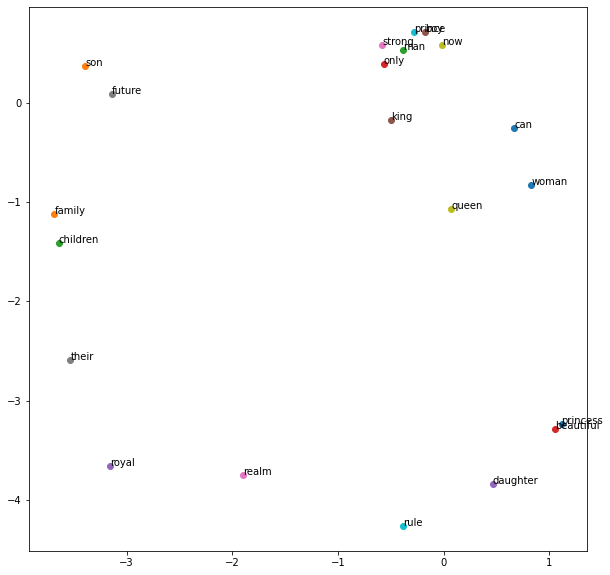

In [95]:
embedding_dict = {}
for word in indices:
    embedding_dict[word] = embeddings[indices[word]]

plt.figure(figsize=(10, 10))
for word in list(indices.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.show()